# Quest 03: AARRR 분석/통계분석

### 문제 1. 데이터 로드 및 탐색

In [ ]:
import pandas as pd

file_path = '/Users/chaeseunghee/Documents/aiffel/Module4/online_retail_II.xlsx'  # 로컬

sheets = pd.read_excel(file_path, sheet_name=None)  # 특정 시트말고 2개의 시트 모두 다 가져오기

df_2009 = sheets['Year 2009-2010']
df_2010 = sheets['Year 2010-2011']

df = pd.concat([df_2009, df_2010], ignore_index=True).drop_duplicates()  # 시트의 데이터 아래로 합치고 인덱스 다시 붙이기

df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [8]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1033036 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1033036 non-null  object        
 1   StockCode    1033036 non-null  object        
 2   Description  1028761 non-null  object        
 3   Quantity     1033036 non-null  int64         
 4   InvoiceDate  1033036 non-null  datetime64[ns]
 5   Price        1033036 non-null  float64       
 6   Customer ID  797885 non-null   float64       
 7   Country      1033036 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 70.9+ MB


### 문제 2. 데이터 전처리

In [23]:
# InvoiceDate 컬럼 날짜형 변환
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Customer ID 결측치 제거
df = df.dropna(subset = ['Customer ID'])

# Customer ID 컬럼 정수형 변환
df['Customer ID'] = df['Customer ID'].astype('int')

# InvoiceDate를 기준으로 데이터 정렬_오름차순
df = df.sort_values('InvoiceDate')

df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom


In [25]:
# Total 컬럼 생성_총 구매금액(Quantity * Price)
df['Total'] = df['Quantity'] * df['Price']

df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,30.0


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 797885 entries, 0 to 1067370
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      797885 non-null  object        
 1   StockCode    797885 non-null  object        
 2   Description  797885 non-null  object        
 3   Quantity     797885 non-null  int64         
 4   InvoiceDate  797885 non-null  datetime64[ns]
 5   Price        797885 non-null  float64       
 6   Customer ID  797885 non-null  int64         
 7   Country      797885 non-null  object        
 8   Total        797885 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 60.9+ MB


### 문제 3. 나라별 구매 인원 시각화

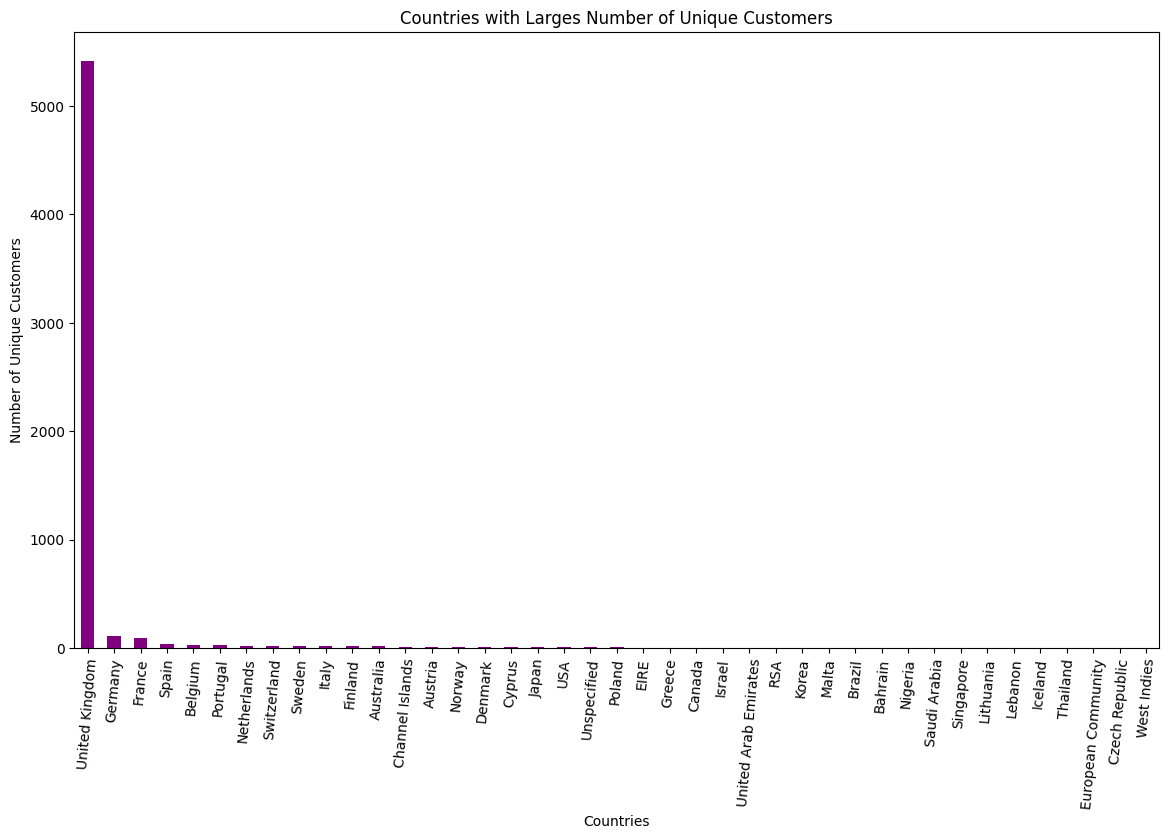

In [81]:
# Country 컬럼으로 Customer ID 인원 계산
country_customers = df.groupby('Country')['Customer ID'].nunique().sort_values(ascending = False)  # 내림차순. UK가 가장 많음

# 시각화_barplot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (14, 8))
country_customers.plot(kind = 'bar', color = 'purple')

plt.title('Countries with Larges Number of Unique Customers')
plt.xlabel('Countries')
plt.ylabel('Number of Unique Customers')
plt.xticks(rotation = 85)

plt.show()

### 문제 4. Acquisition(고객 유입 분석)

In [ ]:
# 고객의 첫 구매 시점을 기준으로 신규 유입 고객 수 계산

# 각 고객의 첫 구매 날짜 추출
first_purchase = df.groupby('Customer ID')['InvoiceDate'].min()
first_purchase_m = first_purchase.dt.to_period('M')       # pandas.Series.dt.to_period('M') 쓰면 연-월만 추출 가능

print(first_purchase_m)

Customer ID
12346    2009-12
12347    2010-10
12348    2010-09
12349    2009-12
12350    2011-02
          ...   
18283    2010-02
18284    2010-10
18285    2010-02
18286    2009-12
18287    2009-12
Name: InvoiceDate, Length: 5942, dtype: period[M]


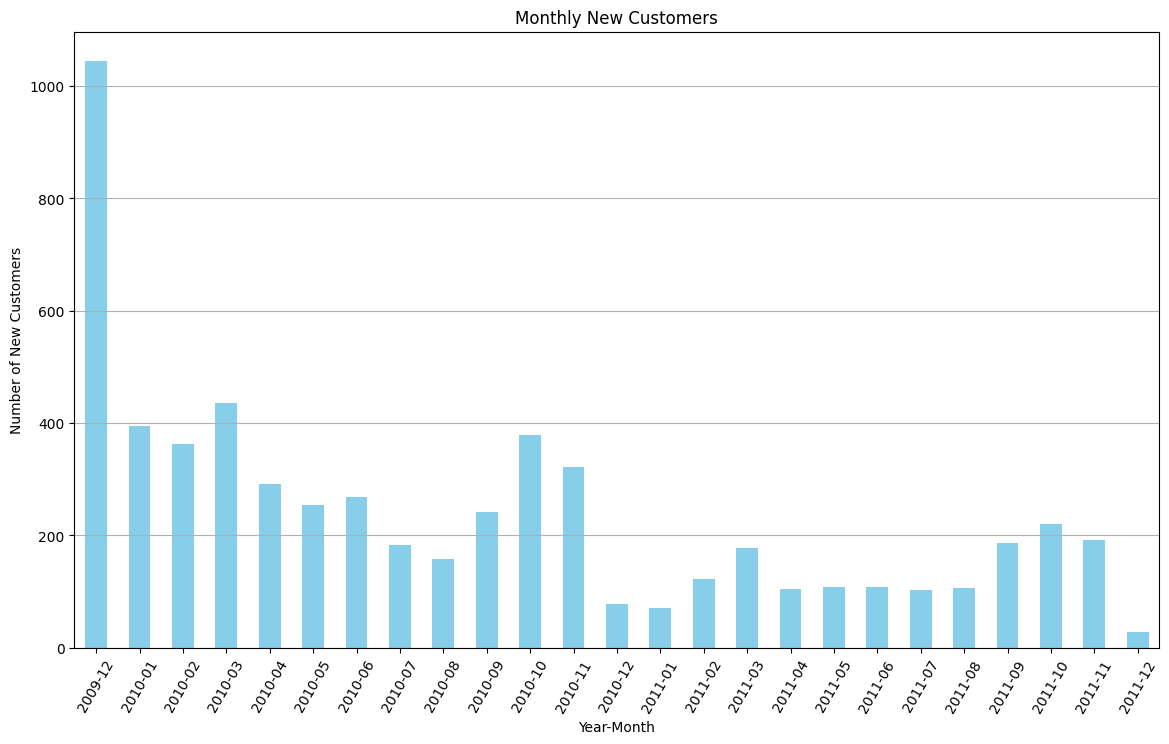

In [89]:
# 월별 신규 고객 수
monthly_new_customers = first_purchase_m.value_counts().sort_index()  # 월별로 행 개수세고, index 월별 순서로 정렬

# 시각화_barplot
plt.figure(figsize = (14, 8))
monthly_new_customers.plot(kind = 'bar', color = 'skyblue')

plt.title('Monthly New Customers')
plt.xlabel('Year-Month')
plt.ylabel('Number of New Customers')
plt.xticks(rotation = 60)
plt.grid(axis = 'y')   # axis: grid y축만 옵션

plt.show()

### 문제 5. Activation (고객 활성화 분석)

In [114]:
# 모든 고객 중 첫 구매 이후 총 구매 금액이 특정 기준 금액 (£50) 이상인 고객을 활성화된 고객으로 정의

unique_customers = df['Customer ID'].nunique()   # 총 고객 수
activated_customers = df.groupby('Customer ID')['Total'].sum() >= 50  # 활성화 고객
activated_customers = activated_customers.sum() # 활성화 고객 수

activation_rate = activated_customers / unique_customers   # 고객 활성화율

print(f'총 고객 수 : {unique_customers}')
print(f'활성화된 고객 수 (첫 구매 후 £50 이상 지출한 고객): {activated_customers}')
print(f'고객 활성화율: {activation_rate:.2%}')

총 고객 수 : 5942
활성화된 고객 수 (첫 구매 후 £50 이상 지출한 고객): 5774
고객 활성화율: 97.17%


### 문제 6. Retention: 코호트 분석 (고객)

In [117]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,30.0


In [137]:
# # 분기별 활성 사용자(MAU)를 분석 - 분기별 활성 고객 수 계산

# # 1) InvoiceDate - 분기로 구분하여 컬럼 생성
# df['Quarter'] = 'Q' + pd.to_datetime(df['InvoiceDate']).dt.quarter.map(str) + '/' + pd.to_datetime(df['InvoiceDate']).dt.year.map(str)

# # 2) 고객별, 분기별 구매액 계산
# quarterly_total = df.groupby(['Customer ID', 'Quarter'])['Total'].sum()
# quarterly_activated_customers = quarterly_total >= 50  # 분기별 가격이 50넘은 고객만 True

# quarterly_activated_customers

# df.drop('Quarter', axis = 1, inplace=True)

In [138]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,30.0


In [199]:
# 분기별 활성 사용자(MAU)를 분석 - 분기별 활성 고객 수_cohort group, cohort index 필요

# 1. 각 구매 분기 컬럼
df['InvoiceQuarter'] = df['InvoiceDate'].dt.to_period('Q')

# 2009년 4분기 데이터는 제외하고 분석해보기
df = df[df['InvoiceQuarter'] >= pd.Period('2010Q1')]

# 2. 고객별 첫 구매 분기 컬럼
df['CohortQuarter'] = df.groupby('Customer ID')['InvoiceQuarter'].transform('min')


df.head(3)

/var/folders/j5/k02gbl3n7xj61xlrkps8gc0c0000gn/T/ipykernel_1775/3307793027.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['InvoiceQuarter'] = df['InvoiceDate'].dt.to_period('Q')


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total,InvoiceQuarter,CohortQuarter,CohortIndex
45228,493410,TEST001,This is a test product.,5,2010-01-04 09:24:00,4.50,12346,United Kingdom,22.50,2010Q1,2010Q1,1
45229,C493411,21539,RETRO SPOTS BUTTER DISH,-1,2010-01-04 09:43:00,4.25,14590,United Kingdom,-4.25,2010Q1,2010Q1,1
45230,493412,TEST001,This is a test product.,5,2010-01-04 09:53:00,4.50,12346,United Kingdom,22.50,2010Q1,2010Q1,1


In [200]:
# 3. 각 고객별, 분기별 구매금액 계산
customer_quarter_total = df.groupby(['Customer ID', 'InvoiceQuarter'])['Total'].sum().reset_index()  # reset_index를 해줘야 'Total' 컬럼 유지(?)

# 4. 분기별 활성화 고객: 50파운드 이상
quarterly_activated_customers = customer_quarter_total[customer_quarter_total['Total'] >= 50]

quarterly_activated_customers

,Customer ID,InvoiceQuarter,Total
4,12347,2010Q4,1323.32
5,12347,2011Q1,475.39
6,12347,2011Q2,1018.77
7,12347,2011Q3,584.91
8,12347,2011Q4,1519.14
...,...,...,...
17434,18287,2010Q2,1071.61
17435,18287,2010Q3,892.60
17436,18287,2010Q4,381.50
17437,18287,2011Q2,765.28


In [182]:
# # 5. cohort_index: 분기별 차이? 첫 구매 이후 몇번쨰 분기인지 계산 - DF 잘못 지정
# # (df['InvoiceQuarter'] - df['CohortQuarter']) 바로 빼면 Type으로 출력되거나 정수형으로 바꿔도 TypeError

# # 연도 * 4 + 분기_숫자로 환산해서 빼주기
# InvoiceQuarter_int = df['InvoiceQuarter'].dt.year * 4 + df['InvoiceQuarter'].dt.quarter  # InvoiceQuarter 변환
# CohortQuarter_int = df['CohortQuarter'].dt.year * 4 + df["CohortQuarter"].dt.quarter     # CohortQuarter 변환

# # CohortIndex 차이
# df['CohortIndex'] = InvoiceQuarter_int - CohortQuarter_int  # 구매분기 차이

In [201]:
# 5. 활성화 고객 데이터에 첫 구매분기 컬럼 추가
quarterly_activated_customers = quarterly_activated_customers.merge(df[['Customer ID', 'CohortQuarter']].drop_duplicates(), on = 'Customer ID', how = 'left')  # 중복 제거 안하면 데이터량 증가

quarterly_activated_customers

,Customer ID,InvoiceQuarter,Total,CohortQuarter
0,12347,2010Q4,1323.32,2010Q4
1,12347,2011Q1,475.39,2010Q4
2,12347,2011Q2,1018.77,2010Q4
3,12347,2011Q3,584.91,2010Q4
4,12347,2011Q4,1519.14,2010Q4
...,...,...,...,...
16726,18287,2010Q2,1071.61,2010Q2
16727,18287,2010Q3,892.60,2010Q2
16728,18287,2010Q4,381.50,2010Q2
16729,18287,2011Q2,765.28,2010Q2


In [202]:
# 6. cohort_index: 분기별 차이? 첫 구매 이후 몇번쨰 분기인지 계산
# (df['InvoiceQuarter'] - df['CohortQuarter']) 바로 빼면 Type으로 출력되거나 정수형으로 바꿔도 TypeError

# 연도 * 4 + 분기_숫자로 환산해서 빼주기
InvoiceQuarter_int = quarterly_activated_customers['InvoiceQuarter'].dt.year * 4 + quarterly_activated_customers['InvoiceQuarter'].dt.quarter  # InvoiceQuarter 변환
CohortQuarter_int = quarterly_activated_customers['CohortQuarter'].dt.year * 4 + quarterly_activated_customers['CohortQuarter'].dt.quarter     # CohortQuarter 변환

# CohortIndex 차이
quarterly_activated_customers['CohortIndex'] = InvoiceQuarter_int - CohortQuarter_int  # 구매분기 차이

quarterly_activated_customers

,Customer ID,InvoiceQuarter,Total,CohortQuarter,CohortIndex
0,12347,2010Q4,1323.32,2010Q4,0
1,12347,2011Q1,475.39,2010Q4,1
2,12347,2011Q2,1018.77,2010Q4,2
3,12347,2011Q3,584.91,2010Q4,3
4,12347,2011Q4,1519.14,2010Q4,4
...,...,...,...,...,...
16726,18287,2010Q2,1071.61,2010Q2,0
16727,18287,2010Q3,892.60,2010Q2,1
16728,18287,2010Q4,381.50,2010Q2,2
16729,18287,2011Q2,765.28,2010Q2,4


In [226]:
# 7. cohort 테이블에 필요한 데이터만 넣기
cohort_table = pd.DataFrame(quarterly_activated_customers.groupby(['CohortQuarter', 'CohortIndex'])['Customer ID'].nunique())
cohort_table.rename({'Customer ID':'Customers'}, axis = 1, inplace = True)

# 8. 잔존율.Retention rate
cohort_table['retention_rate'] = (cohort_table['Customers'] / cohort_table.groupby('CohortQuarter')['Customers'].transform('max'))*100
cohort_table.head(8)

Customers  retention_rate
CohortQuarter CohortIndex                           
2010Q1        0                 1752      100.000000
              1                 1089       62.157534
              2                 1040       59.360731
              3                 1111       63.413242
              4                  827       47.203196
              5                  833       47.545662
              6                  824       47.031963
              7                  827       47.203196

In [227]:
# 9. 피벗 - retention 저장
retention = cohort_table.pivot_table(index = 'CohortQuarter', columns = 'CohortIndex', values = 'retention_rate')
retention

CohortIndex,0,1,2,3,4,5,6,7
CohortQuarter,,,,,,,,
2010Q1,100.0,62.157534,59.360731,63.413242,47.203196,47.545662,47.031963,47.203196
2010Q2,100.0,40.904079,48.732084,24.145535,34.068357,30.540243,34.178611,NaN
2010Q3,100.0,46.688742,26.821192,27.152318,32.450331,32.947020,NaN,NaN
2010Q4,100.0,20.375000,23.625000,20.750000,36.000000,NaN,NaN,NaN
2011Q1,100.0,39.837398,33.604336,36.043360,NaN,NaN,NaN,NaN
2011Q2,100.0,42.586751,39.116719,NaN,NaN,NaN,NaN,NaN
2011Q3,100.0,50.377834,NaN,NaN,NaN,NaN,NaN,NaN
2011Q4,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


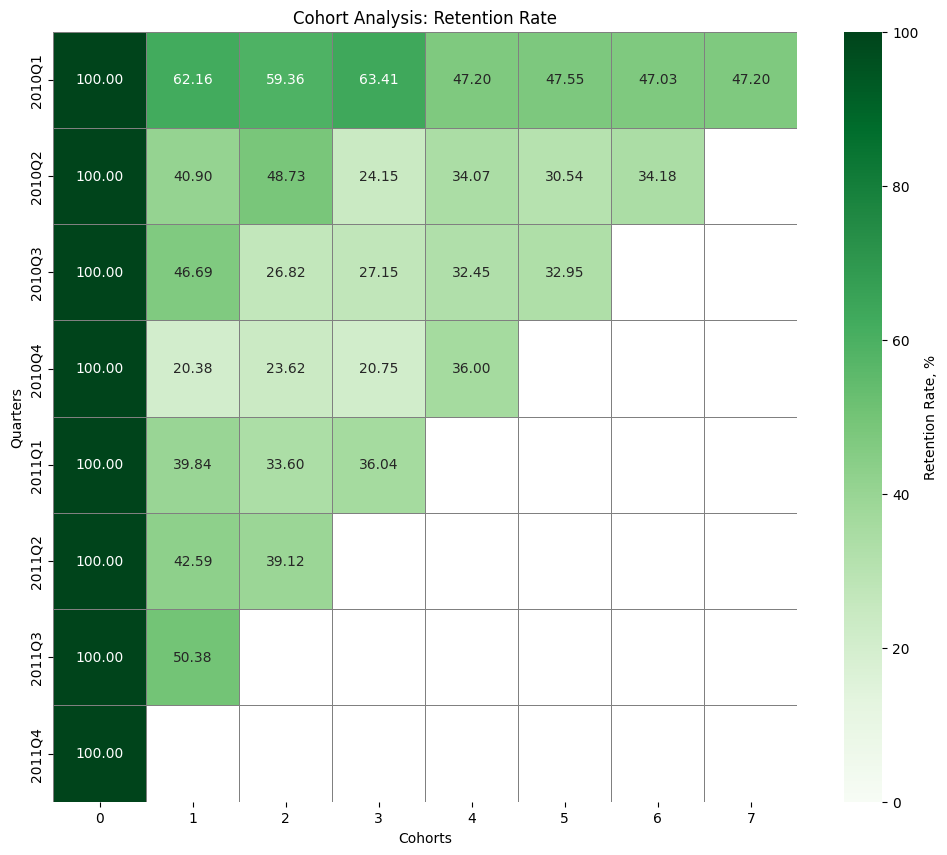

In [228]:
# 10. 시각화_히트맵
plt.figure(figsize = (12, 10))
heatmap = sns.heatmap(
    data=retention,
    annot=True,                # 셀 내부에 값 표시
    fmt='.2f',                 # 텍스트 형식 (소수점 2자리)
    cmap='Greens',             # 색상 팔레트
    cbar_kws={'label': 'Retention Rate, %'},  # 컬러바 제목
    linewidths=0.5,            # 셀 간격
    linecolor='gray',          # 셀 경계 색상
    vmin=0, vmax=100           # Retention Rate의 범위 설정
)
plt.title('Cohort Analysis: Retention Rate')
plt.xlabel('Cohorts')
plt.ylabel('Quarters')
plt.show()

### 문제 7. Retention: 코호트 분석 (평균 구매수량)

In [ ]:
# 1. 데이터 확인
# InvoiceQuarter O. CohortQuarter O

# df에 잘못 구해놨던 CohortIndex 다시 업데이트
# 연도 * 4 + 분기_숫자로 환산해서 빼주기
InvoiceQuarter_int = df['InvoiceQuarter'].dt.year * 4 + df['InvoiceQuarter'].dt.quarter  # InvoiceQuarter 변환
CohortQuarter_int = df['CohortQuarter'].dt.year * 4 + df["CohortQuarter"].dt.quarter     # CohortQuarter 변환

# CohortIndex 차이
df['CohortIndex'] = InvoiceQuarter_int - CohortQuarter_int  # 구매분기 차이

df.head(5)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total,InvoiceQuarter,CohortQuarter,CohortIndex
45228,493410,TEST001,This is a test product.,5,2010-01-04 09:24:00,4.50,12346,United Kingdom,22.50,2010Q1,2010Q1,0
45229,C493411,21539,RETRO SPOTS BUTTER DISH,-1,2010-01-04 09:43:00,4.25,14590,United Kingdom,-4.25,2010Q1,2010Q1,0
45230,493412,TEST001,This is a test product.,5,2010-01-04 09:53:00,4.50,12346,United Kingdom,22.50,2010Q1,2010Q1,0
45235,493414,21533,RETRO SPOT LARGE MILK JUG,12,2010-01-04 10:28:00,4.25,14590,United Kingdom,51.00,2010Q1,2010Q1,0
45236,493414,37508,NEW ENGLAND CERAMIC CAKE SERVER,2,2010-01-04 10:28:00,2.55,14590,United Kingdom,5.10,2010Q1,2010Q1,0


In [240]:
# 2. 평균 구매수량 cohort 테이블 만들기
average_quantity = df.groupby(['CohortQuarter', 'CohortIndex'])['Quantity'].mean().reset_index()

# 3. 피벗
average_quantity = average_quantity.pivot_table(index = 'CohortQuarter', columns = 'CohortIndex', values = 'Quantity')
average_quantity


CohortIndex,0,1,2,3,4,5,6,7
CohortQuarter,,,,,,,,
2010Q1,15.702767,13.250602,14.568909,13.375516,14.059777,13.792975,15.123465,13.668553
2010Q2,10.419444,11.293132,10.450041,14.883074,14.215440,15.458656,9.862748,NaN
2010Q3,13.688728,7.963607,9.741138,11.918424,14.026032,10.305041,NaN,NaN
2010Q4,7.895992,8.459518,8.453841,9.830697,8.876193,NaN,NaN,NaN
2011Q1,9.700350,13.509965,12.432670,11.675351,NaN,NaN,NaN,NaN
2011Q2,8.904742,11.369932,9.293192,NaN,NaN,NaN,NaN,NaN
2011Q3,9.210237,6.254744,NaN,NaN,NaN,NaN,NaN,NaN
2011Q4,9.255487,NaN,NaN,NaN,NaN,NaN,NaN,NaN


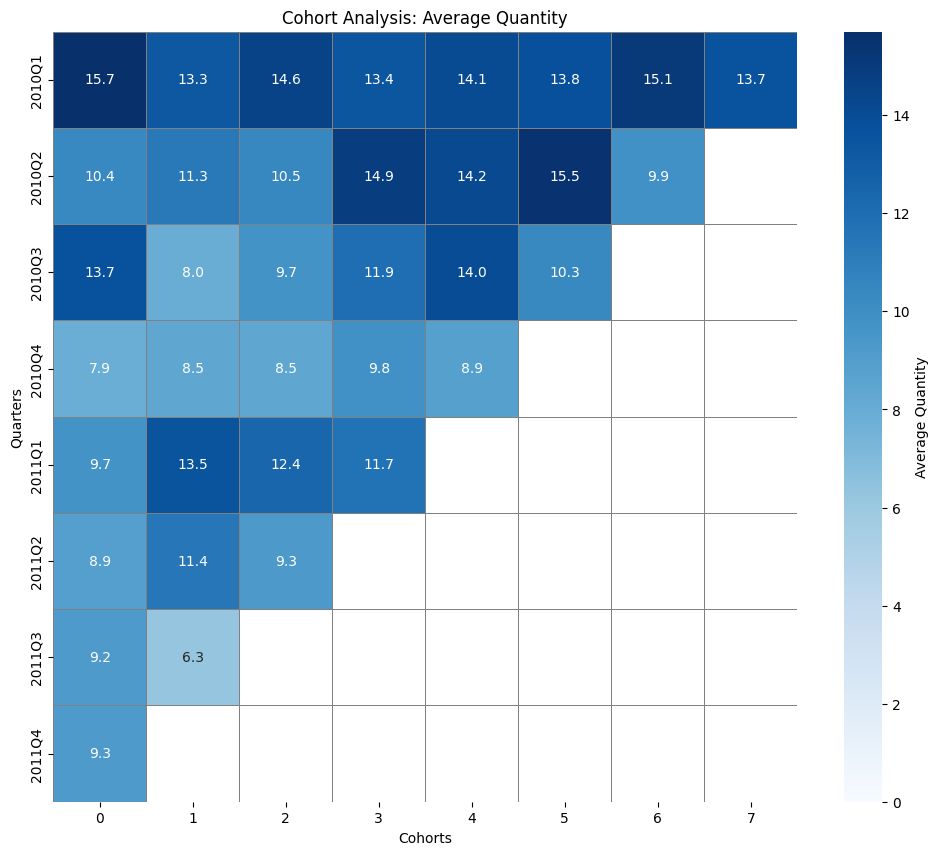

In [241]:
# 4. 시각화
plt.figure(figsize = (12, 10))
heatmap = sns.heatmap(
    data=average_quantity,
    annot=True,                # 셀 내부에 값 표시
    fmt='.1f',                 # 텍스트 형식 (소수점 1자리)
    cmap='Blues',              # 색상 팔레트
    cbar_kws={'label': 'Average Quantity'},  # 컬러바 제목
    linewidths=0.5,            # 셀 간격
    linecolor='gray',          # 셀 경계 색상
    vmin=0                     # 최소값 설정 (필요 시 조정 가능)
)
plt.title('Cohort Analysis: Average Quantity')
plt.xlabel('Cohorts')
plt.ylabel('Quarters')
plt.show()

### 문제 8. Revenue: ARPU

In [242]:
df.head(5)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total,InvoiceQuarter,CohortQuarter,CohortIndex
45228,493410,TEST001,This is a test product.,5,2010-01-04 09:24:00,4.50,12346,United Kingdom,22.50,2010Q1,2010Q1,0
45229,C493411,21539,RETRO SPOTS BUTTER DISH,-1,2010-01-04 09:43:00,4.25,14590,United Kingdom,-4.25,2010Q1,2010Q1,0
45230,493412,TEST001,This is a test product.,5,2010-01-04 09:53:00,4.50,12346,United Kingdom,22.50,2010Q1,2010Q1,0
45235,493414,21533,RETRO SPOT LARGE MILK JUG,12,2010-01-04 10:28:00,4.25,14590,United Kingdom,51.00,2010Q1,2010Q1,0
45236,493414,37508,NEW ENGLAND CERAMIC CAKE SERVER,2,2010-01-04 10:28:00,2.55,14590,United Kingdom,5.10,2010Q1,2010Q1,0


In [308]:
# ARPU = 월별 총 수익 / 고객 수
# 1. 각 고객의 구매연월 컬럼
df['InvoiceMonth'] = df['InvoiceDate'].dt.to_period('M')

# 2. 월별 총 수익
monthly_revenue = df.groupby('InvoiceMonth')['Total'].sum().reset_index()
monthly_revenue.rename({'InvoiceMonth':'Year-Month', 'Total':'Revenue'}, axis = 1, inplace = True)

# 3. 월별 고객 수 
monthly_customers = df.groupby('InvoiceMonth')['Customer ID'].nunique().reset_index()
monthly_customers.rename({'InvoiceMonth':'Year-Month', 'Customer ID':'Customer_counts'}, axis = 1, inplace = True)

# 4. 위의 두 DF 합쳐서 arpu 데이터프레임 만들기
arpu_df = monthly_revenue.merge(monthly_customers, on = 'Year-Month')

# 5. ARPU
arpu_df['ARPU'] = (arpu_df['Revenue'] / arpu_df['Customer_counts']).round(2)

arpu_df.head

<bound method NDFrame.head of    Year-Month      Revenue  Customer_counts    ARPU
0     2010-01   530436.512              786  674.86
1     2010-02   487596.426              807  604.21
2     2010-03   633419.311             1111  570.13
3     2010-04   558007.832              998  559.13
4     2010-05   557873.390             1062  525.30
5     2010-06   568784.550             1095  519.44
6     2010-07   560885.330              988  567.70
7     2010-08   585259.460              964  607.12
8     2010-09   778520.051             1202  647.69
9     2010-10   961520.740             1577  609.72
10    2010-11  1129025.162             1683  670.84
11    2010-12   552372.860              948  582.67
12    2011-01   473731.900              783  605.02
13    2011-02   435534.070              798  545.78
14    2011-03   578576.210             1020  567.23
15    2011-04   425222.671              899  473.00
16    2011-05   647011.670             1079  599.64
17    2011-06   606862.520        

In [311]:
# 시각화 코드에 맞게 데이터 정리
arpu = arpu_df.drop(['Revenue', 'Customer_counts'], axis = 1)
arpu['Year-Month'] = arpu['Year-Month'].dt.strftime('%Y-%b')
arpu.head()

,Year-Month,ARPU
0,2010-Jan,674.86
1,2010-Feb,604.21
2,2010-Mar,570.13
3,2010-Apr,559.13
4,2010-May,525.30


<Figure size 2000x1000 with 0 Axes>

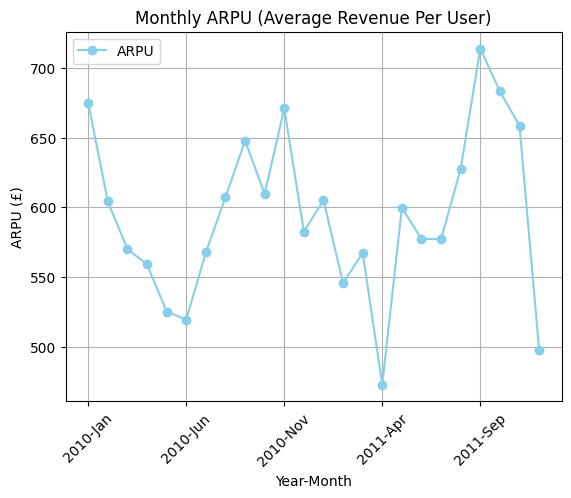

In [ ]:
# 6. 시각화
plt.figure(figsize=(12, 6))
arpu.plot(kind='line', x = 'Year-Month', y = 'ARPU', marker='o', color='skyblue')
plt.title("Monthly ARPU (Average Revenue Per User)")
plt.xlabel("Year-Month")
plt.ylabel("ARPU (£)")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### 문제 9. Revenue(CLV)

In [318]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 766609 entries, 45228 to 1067370
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Invoice         766609 non-null  object        
 1   StockCode       766609 non-null  object        
 2   Description     766609 non-null  object        
 3   Quantity        766609 non-null  int64         
 4   InvoiceDate     766609 non-null  datetime64[ns]
 5   Price           766609 non-null  float64       
 6   Customer ID     766609 non-null  int64         
 7   Country         766609 non-null  object        
 8   Total           766609 non-null  float64       
 9   InvoiceQuarter  766609 non-null  period[Q-DEC] 
 10  CohortQuarter   766609 non-null  period[Q-DEC] 
 11  CohortIndex     766609 non-null  int64         
 12  InvoiceMonth    766609 non-null  period[M]     
dtypes: datetime64[ns](1), float64(2), int64(3), object(4), period[M](1), period[Q-DEC](2)
mem

In [351]:
# 1. 고객별 분석 데이터
customer_data = df.groupby('Customer ID').agg({
    'Invoice' : 'nunique',        # 구매 횟수
    'Total' : 'sum',              # 총 구매 금액
    'InvoiceDate' : ['min', 'max'] # 첫 구매일, 마지막 구매일
}).reset_index()

customer_data.columns = ['Customer ID', 'PurchaseFrequency', 'TotalRevenue', 'FirstPurchaseDate', 'LastPurchaseDate']

customer_data.head()

,Customer ID,PurchaseFrequency,TotalRevenue,FirstPurchaseDate,LastPurchaseDate
0,12346,12,-165.24,2010-01-04 09:24:00,2011-01-18 10:17:00
1,12347,8,4921.53,2010-10-31 14:20:00,2011-12-07 15:52:00
2,12348,5,2019.40,2010-09-27 14:59:00,2011-09-25 13:13:00
3,12349,4,4428.69,2010-04-29 13:20:00,2011-11-21 09:51:00
4,12350,1,334.40,2011-02-02 16:01:00,2011-02-02 16:01:00


In [356]:
# 2. Customer Lifetime (일 단위)
customer_data['CustomerLifetime'] = (customer_data['LastPurchaseDate'] - customer_data['FirstPurchaseDate']).dt.days + 1  # 최대 최소 빼준 뒤 1 더하기

# 3. 평균 구매 금액
customer_data['AverageOrderValue'] = customer_data['TotalRevenue'] / customer_data['PurchaseFrequency']

# # 4. 평균 구매 빈도
customer_data['AveragePurchaseFrequency'] = customer_data['PurchaseFrequency'] / customer_data['CustomerLifetime']

# 5. CLV 계산
customer_data['CLV'] = customer_data['AverageOrderValue'] * customer_data['AveragePurchaseFrequency'] * customer_data['CustomerLifetime']

customer_data.sort_values(by = 'CLV', ascending = False)

,Customer ID,PurchaseFrequency,TotalRevenue,FirstPurchaseDate,LastPurchaseDate,CustomerLifetime,AverageOrderValue,AveragePurchaseFrequency,CLV
5659,18102,144,529374.87,2010-01-05 14:07:00,2011-12-09 11:50:00,703,3676.214375,0.204836,529374.87
2274,14646,159,508645.60,2010-01-11 14:37:00,2011-12-08 12:12:00,696,3199.028931,0.228448,508645.60
1788,14156,192,285038.72,2010-01-04 13:35:00,2011-11-30 10:54:00,695,1484.576667,0.276259,285038.72
2534,14911,494,259583.97,2010-01-07 16:15:00,2011-12-08 15:54:00,700,525.473623,0.705714,259583.97
5020,17450,61,231390.55,2010-09-27 16:59:00,2011-12-01 13:29:00,430,3793.287705,0.141860,231390.55
...,...,...,...,...,...,...,...,...,...
3455,15849,1,-5876.34,2010-04-22 12:55:00,2010-04-22 12:55:00,1,-5876.340000,1.000000,-5876.34
3026,15413,4,-7044.80,2010-01-10 12:37:00,2010-10-05 15:15:00,269,-1761.200000,0.014870,-7044.80
1698,14063,9,-10468.80,2010-01-08 11:50:00,2010-10-05 11:52:00,271,-1163.200000,0.033210,-10468.80
568,12918,3,-10953.50,2010-03-23 15:20:00,2010-03-23 15:24:00,1,-3651.166667,3.000000,-10953.50


In [359]:
# 데이터 정리
CLV_data = customer_data.drop(['PurchaseFrequency', 'TotalRevenue', 'FirstPurchaseDate', 'LastPurchaseDate'], axis = 1)

CLV_data.sort_values(by = 'CLV', ascending = False)

,Customer ID,CustomerLifetime,AverageOrderValue,AveragePurchaseFrequency,CLV
5659,18102,703,3676.214375,0.204836,529374.87
2274,14646,696,3199.028931,0.228448,508645.60
1788,14156,695,1484.576667,0.276259,285038.72
2534,14911,700,525.473623,0.705714,259583.97
5020,17450,430,3793.287705,0.141860,231390.55
...,...,...,...,...,...
3455,15849,1,-5876.340000,1.000000,-5876.34
3026,15413,269,-1761.200000,0.014870,-7044.80
1698,14063,271,-1163.200000,0.033210,-10468.80
568,12918,1,-3651.166667,3.000000,-10953.50


## 기초통계 문제

### 문제 10.
- 어떤 회사의 고객 대기시간은 5분에서 15분 사이의 균등분포를 따릅니다. 
- 고객 100명이 대기한 시간을 시뮬레이션하고, 평균 대기시간과 표준편차를 계산하세요.


In [370]:
from scipy.stats import uniform
import numpy as np

# 균등 분포 생성
customers = 100
waiting_times = uniform.rvs(loc = 5, scale = 10, size = customers)

print(np.shape(waiting_times))

# 평균과 표준편차
mean_waiting_time = np.mean(waiting_times)
std_waiting_time = np.std(waiting_times, ddof = 1)

# 결과
print(f'평균 대기시간: {mean_waiting_time:.2f}')
print(f'표준편차: {std_waiting_time:.2f}')

(100,)
평균 대기시간: 9.54
표준편차: 2.82


### 문제 11.
- 한 신제품의 초기 성공 확률이 0.3이라고 가정합니다.
- 10회의 시뮬레이션에서 성공한 횟수를 구하고, 각 성공 여부를 출력하세요.

In [368]:
# 베르누이
from scipy.stats import bernoulli

# 확률
p = 0.3
n = 10

# 베르누이 분포 시행
outcomes = bernoulli.rvs(p, size = n)
success_count = outcomes.sum()

print(f"각 시도 결과: {outcomes}")
print(f"성공 횟수: {success_count}")

각 시도 결과: [1 0 0 0 1 1 1 0 1 0]
성공 횟수: 5


### 문제 12.
- 한 수업에서 학생 20명이 5문제로 구성된 퀴즈를 치릅니다.
- 각 문제의 정답 확률은 0.7이라고 가정할 때, 각 학생이 맞힌 점수를 시뮬레이션하고, 전체 학생의 평균 점수를 계산하세요.

In [371]:
# 이항분포
from scipy.stats import binom

# 시뮬레이션 환경
students = 20
quizzes = 5
p = 0.7

# 이항분포 시행_binom.rvs(n, p, size)
scores = binom.rvs(n = quizzes, p = p, size = students)
average_score = np.mean(scores)

print(f"학생별 점수: {scores}")
print(f"평균 점수: {average_score:.2f}")

학생별 점수: [3 4 3 3 4 3 4 5 3 5 5 4 4 4 3 2 3 5 5 2]
평균 점수: 3.70


### 문제 13.
- 한 공장에서 생산되는 제품의 무게는 평균 50g, 표준편차 5g의 정규분포를 따릅니다.
- 1000개의 제품 무게를 시뮬레이션하고, 무게가 45g 이상 55g 이하인 제품의 비율을 계산(변수명: within_range)하세요. 
- 무게 분포의 히스토그램을 그리세요. 

In [373]:
from scipy.stats import norm
import matplotlib.pyplot as plt 

# 시뮬레이션 환경
mu = 50
sigma = 5
samples_count = 1000

# 정규분포 시행
weights = norm.rvs(loc = mu, scale = sigma, size = samples_count)

# 비율 계산
products = (weights >= 45) & (weights <= 55)

within_range = len(weights[products]) / len(weights)

print(f"45g 이상 55g 이하 비율: {within_range:.2%}")

45g 이상 55g 이하 비율: 69.40%


45g 이상 55g 이하 비율: 69.40%


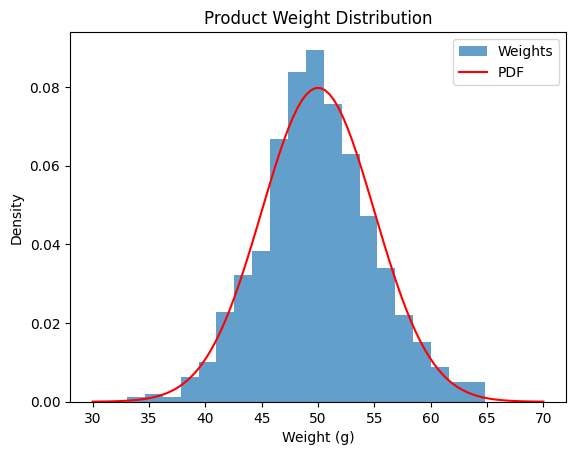

In [376]:
print(f"45g 이상 55g 이하 비율: {within_range:.2%}")

# 히스토그램
plt.hist(weights, bins = 20, density=True, label = 'Weights', alpha = 0.7)
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 100)
plt.plot(x, norm.pdf(x, mu, sigma), 'r-', label = 'PDF')

plt.xlabel('Weight (g)')
plt.ylabel('Density')
plt.title('Product Weight Distribution')
plt.legend()
plt.show()


### 회고
- K: 
    - 강의를 복습했던 것이 도움이 되었다.
    - 강의자료를 찾아보면서 각 문제의 단계를 어떻게 작성해 나가면 좋을지 열심히 생각하고 코드를 여러가지로 많이 쳐보면서 결과를 확인해보았다.
- P: 
    - 코드가 길어지고 변수와 데이터프레임이 많아지면서 수정할 부분을 찾기가 어려워서 많이 헤맸다.
    - 데이터의 수치가 안 맞기 시작하면 어떻게 고쳐가야할지 감을 잡기가 막막했다.
- T: 
    - 코드 작문을 손에 익혀서 코드를 점점 더 깔끔하게 쓰기 위해서 노력해야겠다.
    - 원하는 도메인을 찾아 도메인에 대한 지식도 쌓아야 데이터를 원하는 대로 분석할 수 있다!